# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('orders.csv')
raw_data.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
count,185013.000000,185013,185013,185013,1.850130e+05,1.850130e+05,185013.000000,185013.000000,185013.000000
unique,NaN,6,1826,1839,NaN,NaN,NaN,NaN,NaN
top,NaN,Silver,20-Dec-21,20-Dec-21,NaN,NaN,NaN,NaN,NaN
freq,NaN,74123,217,207,NaN,NaN,NaN,NaN,NaN
mean,45379.318745,NaN,NaN,NaN,1.237010e+08,2.289549e+11,1.671645,138.592982,38.695275
std,27231.520233,NaN,NaN,NaN,4.288138e+05,1.066198e+10,0.897982,183.848434,42.368467
min,1.000000,NaN,NaN,NaN,1.230000e+08,2.102001e+11,1.000000,0.625000,0.200000
25%,22061.000000,NaN,NaN,NaN,1.233159e+08,2.201014e+11,1.000000,39.500000,13.000000
50%,44069.000000,NaN,NaN,NaN,1.236862e+08,2.301005e+11,1.000000,83.700000,25.200000
75%,70350.000000,NaN,NaN,NaN,1.240719e+08,2.402001e+11,2.000000,170.400000,49.350000


### Checking if there are a null

In [4]:
raw_data.isnull().sum()

Customer ID                          0
Customer Status                      0
Date Order was placed                0
Delivery Date                        0
Order ID                             0
Product ID                           0
Quantity Ordered                     0
Total Retail Price for This Order    0
Cost Price Per Unit                  0
dtype: int64

### Converting Date Columns to datetime

In [5]:
raw_data['Date Order was placed'] = pd.to_datetime(raw_data['Date Order was placed'])
raw_data['Delivery Date'] = pd.to_datetime(raw_data['Delivery Date'])

/tmp/ipykernel_12402/3687544234.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['Date Order was placed'] = pd.to_datetime(raw_data['Date Order was placed'])
/tmp/ipykernel_12402/3687544234.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['Delivery Date'] = pd.to_datetime(raw_data['Delivery Date'])


In [6]:
raw_data.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30


In [7]:
colm = ['Date Order was placed', 'Delivery Date',
        'Quantity Ordered', 'Cost Price Per Unit']

### Select the columns that we will need

In [8]:
data = raw_data[colm]
data.describe()

,Date Order was placed,Delivery Date,Quantity Ordered,Cost Price Per Unit
count,185013,185013,185013.000000,185013.000000
mean,2019-08-28 00:48:58.794571008,2019-08-29 02:10:46.903731456,1.671645,38.695275
min,2017-01-01 00:00:00,2017-01-02 00:00:00,1.000000,0.200000
25%,2018-06-21 00:00:00,2018-06-22 00:00:00,1.000000,13.000000
50%,2019-08-26 00:00:00,2019-08-28 00:00:00,1.000000,25.200000
75%,2020-11-27 00:00:00,2020-11-27 00:00:00,2.000000,49.350000
max,2021-12-31 00:00:00,2022-01-14 00:00:00,10.000000,791.800000
std,NaN,NaN,0.897982,42.368467


In [9]:
data['Total Price'] = data['Quantity Ordered'] * data['Cost Price Per Unit']
data

/tmp/ipykernel_12402/2082047100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Price'] = data['Quantity Ordered'] * data['Cost Price Per Unit']


,Date Order was placed,Delivery Date,Quantity Ordered,Cost Price Per Unit,Total Price
0,2017-01-01,2017-01-07,2,20.70,41.40
1,2017-01-01,2017-01-05,1,9.95,9.95
2,2017-01-01,2017-01-04,1,0.80,0.80
3,2017-01-01,2017-01-06,1,24.05,24.05
4,2017-01-01,2017-01-04,1,18.30,18.30
...,...,...,...,...,...
185008,2021-12-31,2021-12-31,4,6.35,25.40
185009,2021-12-31,2021-12-31,1,7.25,7.25
185010,2021-12-31,2021-12-31,5,31.40,157.00
185011,2021-12-31,2022-01-02,2,68.00,136.00


### droping the unwanted columns

In [10]:
data_cleaned = data.drop(['Quantity Ordered', 'Cost Price Per Unit'], axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date Order was placed  185013 non-null  datetime64[ns]
 1   Delivery Date          185013 non-null  datetime64[ns]
 2   Total Price            185013 non-null  float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 4.2 MB


### Converting the date to a month period , and then sum the price in each month

In [12]:
data_cleaned1 = data_cleaned.drop(['Delivery Date'], axis=1)
data_cleaned1['Date Order was placed'] = data_cleaned1['Date Order was placed'].dt.to_period("M")
monthly_sales = data_cleaned1.groupby('Date Order was placed').sum().reset_index()
monthly_sales

,Date Order was placed,Total Price
0,2017-01,132863.00
1,2017-02,109982.34
2,2017-03,104151.88
3,2017-04,151724.89
4,2017-05,177104.76
5,2017-06,222126.85
6,2017-07,226330.88
7,2017-08,221757.91
8,2017-09,97734.61
9,2017-10,99592.46


### converting the date column to timestamp type

In [13]:
monthly_sales['Date Order was placed'] = monthly_sales['Date Order was placed'].dt.to_timestamp()
monthly_sales

,Date Order was placed,Total Price
0,2017-01-01,132863.00
1,2017-02-01,109982.34
2,2017-03-01,104151.88
3,2017-04-01,151724.89
4,2017-05-01,177104.76
5,2017-06-01,222126.85
6,2017-07-01,226330.88
7,2017-08-01,221757.91
8,2017-09-01,97734.61
9,2017-10-01,99592.46


## Visualization

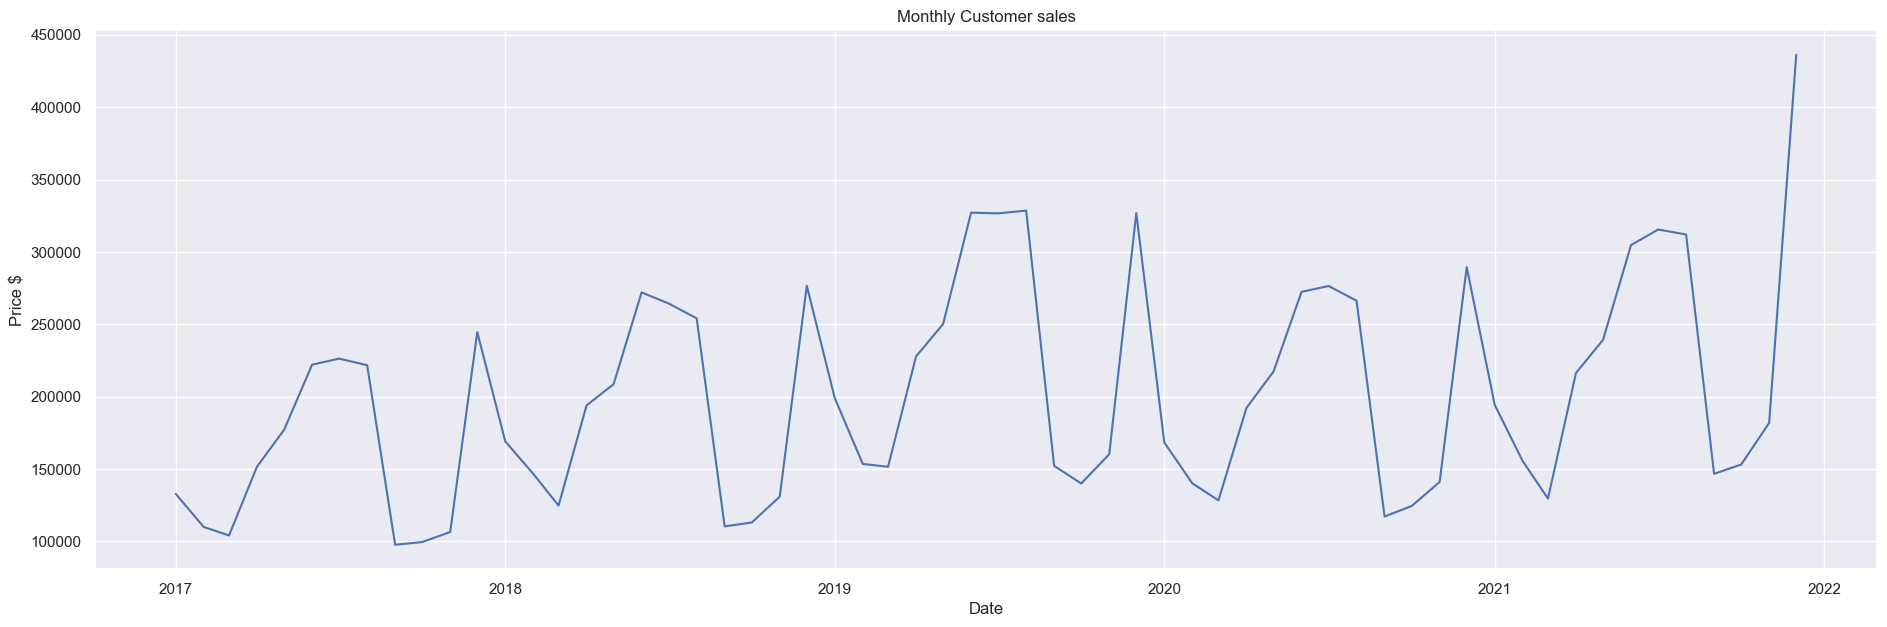

In [35]:
plt.figure(figsize=(23,7))
plt.plot(monthly_sales['Date Order was placed'], monthly_sales['Total Price'])
plt.ylabel('Price $')
plt.xlabel('Date')
plt.title('Monthly Customer sales')
plt.show()

### call the difference sales column

In [38]:
monthly_sales['Sales diff'] = monthly_sales['Total Price'].diff()
# monthly_sales = monthly_sales.dropna()
monthly_sales

/tmp/ipykernel_12402/2018334193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales['Sales diff'] = monthly_sales['Total Price'].diff()


,Date Order was placed,Total Price,Sales diff
1,2017-02-01,109982.34,NaN
2,2017-03-01,104151.88,-5830.46
3,2017-04-01,151724.89,47573.01
4,2017-05-01,177104.76,25379.87
5,2017-06-01,222126.85,45022.09
6,2017-07-01,226330.88,4204.03
7,2017-08-01,221757.91,-4572.97
8,2017-09-01,97734.61,-124023.30
9,2017-10-01,99592.46,1857.85
10,2017-11-01,106549.14,6956.68


In [55]:
monthly_sales= monthly_sales.fillna(monthly_sales['Total Price'].values[0])

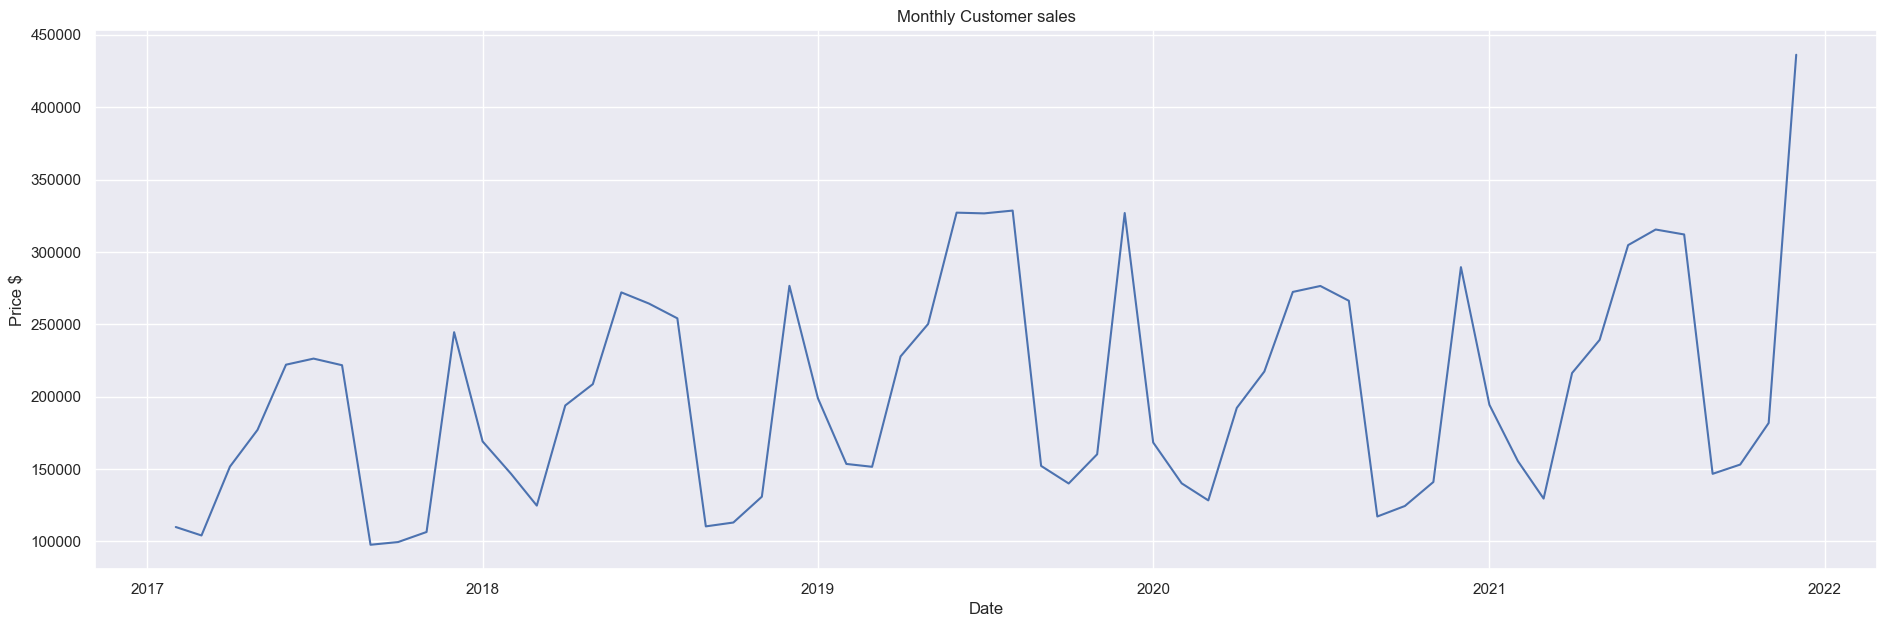

In [56]:
plt.figure(figsize=(23,7))
plt.plot(monthly_sales['Date Order was placed'], monthly_sales['Total Price'])
plt.ylabel('Price $')
plt.xlabel('Date')
plt.title('Monthly Customer sales')
plt.show()

In [57]:
supervised_data = monthly_sales.drop(['Date Order was placed', 'Total Price'], axis=1)
supervised_data

,Sales diff
1,109982.34
2,-5830.46
3,47573.01
4,25379.87
5,45022.09
6,4204.03
7,-4572.97
8,-124023.30
9,1857.85
10,6956.68


### Prepering the supervised Data

In [64]:
for i in range(1,13):
    column_name = 'month_' + str(i)
    supervised_data[column_name] = monthly_sales['Sales diff'].shift(i)
supervised_data

,Sales diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,109982.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,45022.09,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4204.03,45022.09,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-4572.97,4204.03,45022.09,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN,NaN
8,-124023.30,-4572.97,4204.03,45022.09,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN,NaN
9,1857.85,-124023.30,-4572.97,4204.03,45022.09,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN,NaN
10,6956.68,1857.85,-124023.30,-4572.97,4204.03,45022.09,25379.87,47573.01,-5830.46,109982.34,NaN,NaN,NaN


In [65]:
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data

,Sales diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97,4204.03,45022.09,25379.87,47573.01,-5830.46,109982.34
1,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97,4204.03,45022.09,25379.87,47573.01,-5830.46
2,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97,4204.03,45022.09,25379.87,47573.01
3,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97,4204.03,45022.09,25379.87
4,63398.47,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97,4204.03,45022.09
5,-7696.07,63398.47,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97,4204.03
6,-10223.90,-7696.07,63398.47,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30,-4572.97
7,-143732.54,-10223.90,-7696.07,63398.47,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85,-124023.30
8,2672.84,-143732.54,-10223.90,-7696.07,63398.47,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68,1857.85
9,17841.28,2672.84,-143732.54,-10223.90,-7696.07,63398.47,14727.42,69172.37,-21938.11,-22401.30,-75460.20,138030.87,6956.68


## Train Test Spilt

In [68]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print('train data: ', train_data.shape)
print('test data: ', test_data.shape)

train data:  (35, 13)
test data:  (12, 13)


## scale the data

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [71]:
x_train, y_train = train_data[:,1:], train_data[:,0:1]
x_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()

print('x_train ', x_train.shape)
print('y_train ', y_train.shape)
print('x_test ', x_test.shape)
print('y_test ', y_test.shape)

x_train  (35, 12)
y_train  (35,)
x_test  (12, 12)
y_test  (12,)


In [ ]:
plt.scatter(y_train, y_hat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
# to check the residual which the difference between y_train and y_hat
sns.displot(y_train - y_hat, kde=True)

In [ ]:
reg.score(x_train,y_train)

## Finding the wieghts and bias

In [ ]:
reg.intercept_

In [ ]:
reg.coef_

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Wieghts'] = reg.coef_
reg_summary

## Testing

In [ ]:
y_test_hat = reg.predict(x_test)

In [ ]:
plt.scatter(y_test, y_test_hat, alpha=0.3)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
df_pf = pd.DataFrame(np.exp(y_test_hat), columns=['Prediction'])
df_pf.head()

In [ ]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test

In [ ]:

df_pf["Target"] = np.exp(y_test)
df_pf

In [ ]:
sns.displot(y_test - y_test_hat, kde=True)

In [ ]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf

In [ ]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

In [ ]:
df_pf.describe()

In [ ]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])